In [67]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [68]:
#Get Data
cdata = 'https://raw.githubusercontent.com/datach33z3/A7/main/Mall_Customers.csv'
cdata = pd.read_csv(cdata, error_bad_lines=False)
cdata.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
#Data Info
cdata.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [70]:
#No blamk data so thats good for us now lets see what the data looks like and its correlations.
cdata.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [71]:
#We will obvioulsy drop customer ID before any correlation mapping is done its not needed. 
cdata.drop(['CustomerID'], axis=1, inplace=True)
cdata.replace({'Gender': {'Male': 0, 'Female': 1}})

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


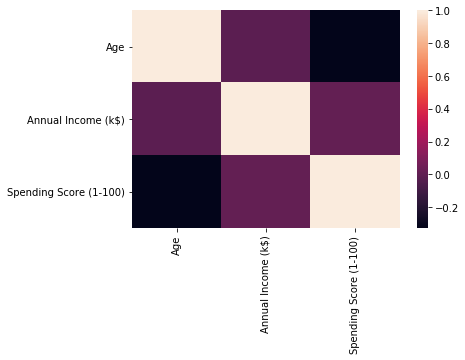

In [74]:
#Now we will run a heat map to see any correlations upfront. 
plt.figure()
sns.heatmap(cdata.corr())

In [75]:
#What we can see immediatly from this is that as age increases so does the spending score more so
#than anannual income. and because the annual income shows so close to 0 it means that as Annual 
# income increases so does spending score as sop be expected.

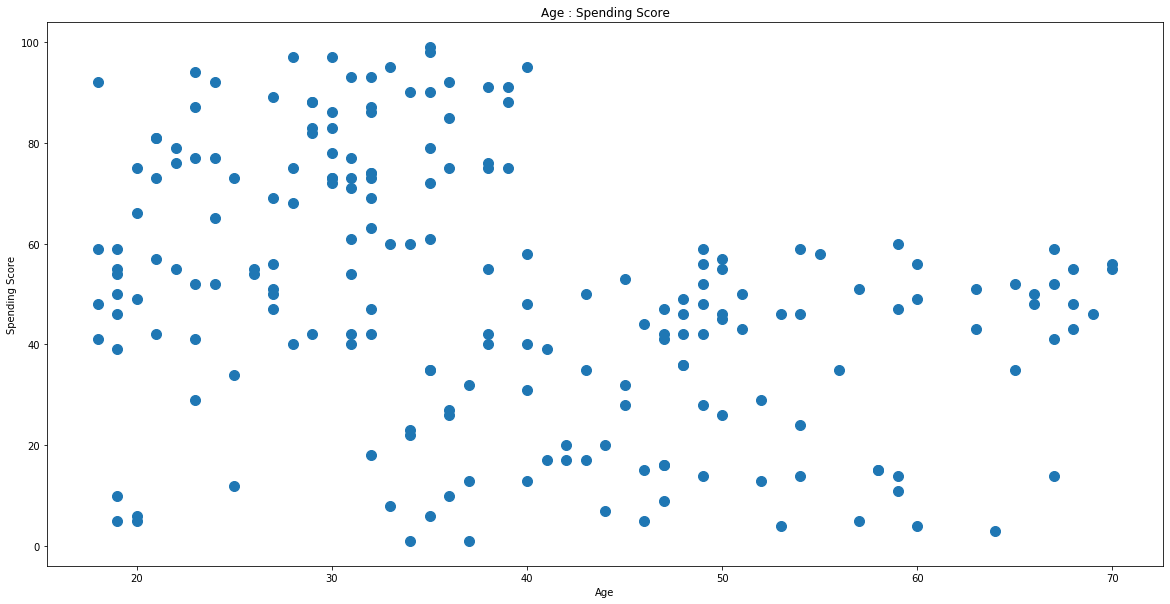

In [77]:
#Lets Plot it
plt.figure(1 , figsize = (20 , 10))
plt.title('Age : Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = cdata, s = 100)
plt.show()

In [78]:
# We can visually see that was said was true that the correlations in Age and Spending Score.
# we will be using these 2 point for out Cluster. 

In [79]:
# Cluster set up first we have to determine the amount of clusters we will be using by setting up
# the elbow method for the variables Age and Spending score

In [86]:
cdataK = cdata.iloc[:, [1, 3]].values

In [87]:
hval = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(cdataK)
    hval.append(kmeans.inertia_)

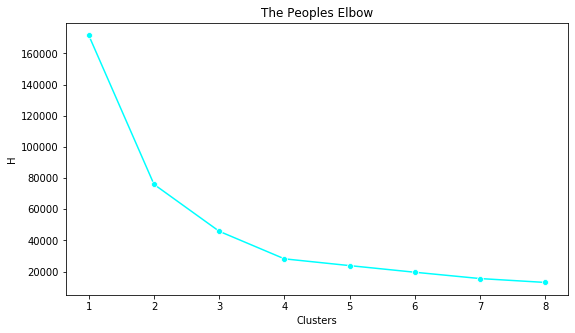

In [88]:
plt.figure(figsize=(9,5))
sns.lineplot(range(1, 9), hval,marker='o',color='Cyan')
plt.title('The Peoples Elbow')
plt.xlabel('Clusters')
plt.ylabel('H')
plt.show()

In [89]:
# Four is the clear cut number of clusters we are going to be implemanting as that is where the line
# takes a hrd cut to 0 
# Let fit it

In [96]:
cdataFin = KMeans(n_clusters = 4, init = 'k-means++', random_state = 50)
ycdata = cdataFin.fit_predict(cdataK)

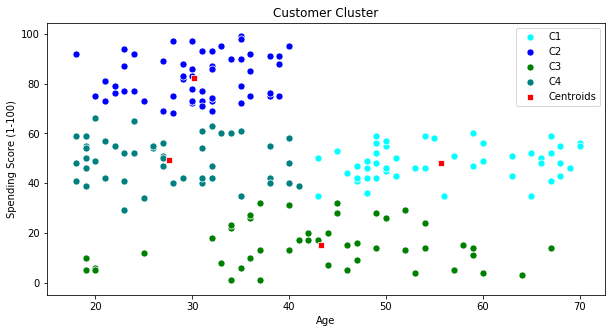

In [97]:
plt.figure(figsize=(10,5))
sns.scatterplot(cdataK[ycdata == 0, 0], cdataK[ycdata == 0, 1], color = 'cyan', label = 'C1',s=50)
sns.scatterplot(cdataK[ycdata == 1, 0], cdataK[ycdata == 1, 1], color = 'blue', label = 'C2',s=50)
sns.scatterplot(cdataK[ycdata == 2, 0], cdataK[ycdata == 2, 1], color = 'green', label = 'C3',s=50)
sns.scatterplot(cdataK[ycdata == 3, 0], cdataK[ycdata == 3, 1], color = 'teal', label = 'C4',s=50)
sns.scatterplot(cdataFin.cluster_centers_[:, 0], cdataFin.cluster_centers_[:, 1], color = 'red',label = 'Centroids',marker=',')
plt.grid(False)
plt.title('Customer Cluster')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [98]:
cdataK2 = cdata.iloc[:, [2, 3]].values

In [99]:
hval = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(cdataK2)
    hval.append(kmeans.inertia_)

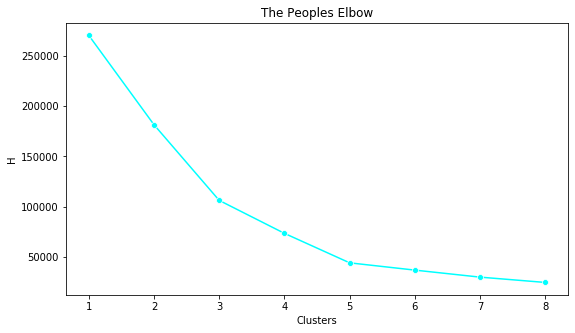

In [100]:
plt.figure(figsize=(9,5))
sns.lineplot(range(1, 9), hval,marker='o',color='Cyan')
plt.title('The Peoples Elbow')
plt.xlabel('Clusters')
plt.ylabel('H')
plt.show()

In [104]:
cdataFin2 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 50)
ycdata2 = cdataFin2.fit_predict(cdataK2)

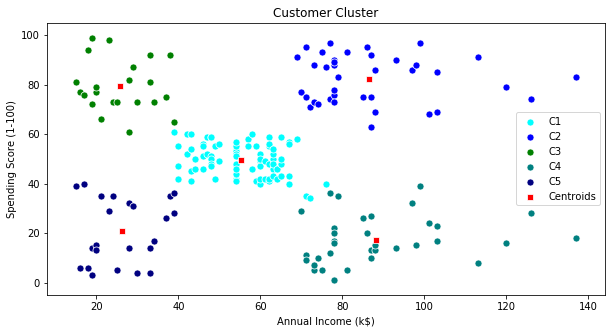

In [105]:
plt.figure(figsize=(10,5))
sns.scatterplot(cdataK2[ycdata2 == 0, 0], cdataK2[ycdata2 == 0, 1], color = 'cyan', label = 'C1',s=50)
sns.scatterplot(cdataK2[ycdata2 == 1, 0], cdataK2[ycdata2 == 1, 1], color = 'blue', label = 'C2',s=50)
sns.scatterplot(cdataK2[ycdata2 == 2, 0], cdataK2[ycdata2 == 2, 1], color = 'green', label = 'C3',s=50)
sns.scatterplot(cdataK2[ycdata2 == 3, 0], cdataK2[ycdata2 == 3, 1], color = 'teal', label = 'C4',s=50)
sns.scatterplot(cdataK2[ycdata2 == 4, 0], cdataK2[ycdata2 == 4, 1], color = 'navy', label = 'C5',s=50)
sns.scatterplot(cdataFin2.cluster_centers_[:, 0], cdataFin2.cluster_centers_[:, 1], color = 'red',label = 'Centroids',marker=',')
plt.grid(False)
plt.title('Customer Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()